# Predict Employee Turnover

### Build models (Logistic Regression, SVM, KNN, Random Forest) to predict the target variable "left" (modeling if an employee has left the company or not)

The data was downloaded from Kaggle. Each row represents an employee, each column contains employee attributes:
- Satisfaction_level (0–1)
- Last_evaluation (Time since last evaluation in years)
- Number_projects (Number of projects completed while at work)
- Average_monthly_hours (Average monthly hours at workplace)
- Time_spend_company (Time spent at the company in years)
- Work_accident (Whether the employee had a workplace accident)
- Left (Whether the employee left the workplace or not (1 or 0))
- Promotion_last_5years (Whether the employee was promoted in the last five years)
- Sales (Department in which they work for)
- Salary (Relative level of salary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
df = pd.read_csv('hr_data.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [44]:
df.shape

(14999, 11)

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

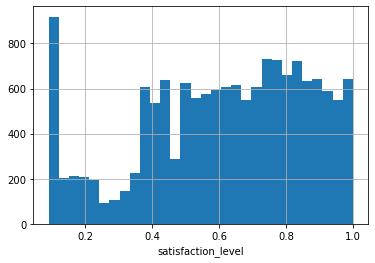

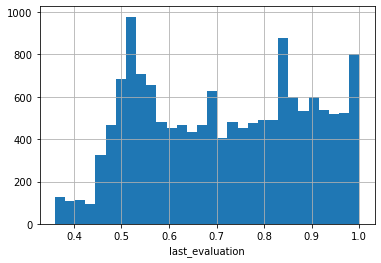

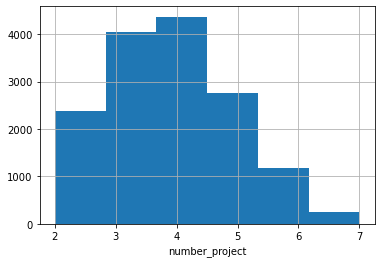

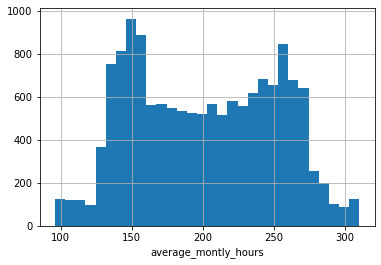

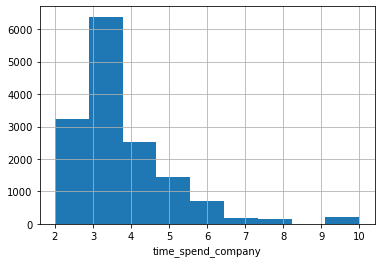

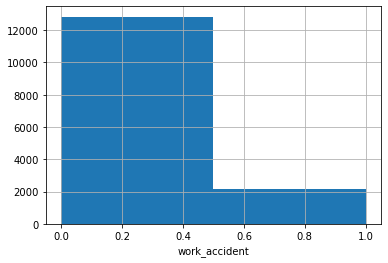

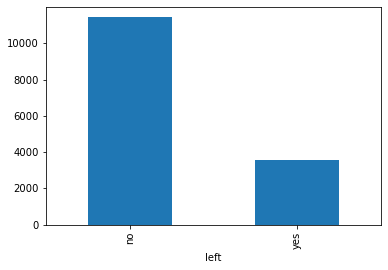

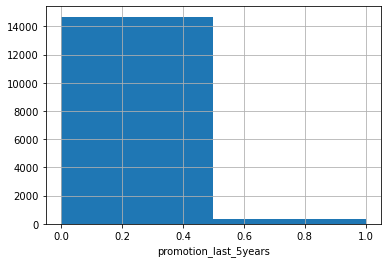

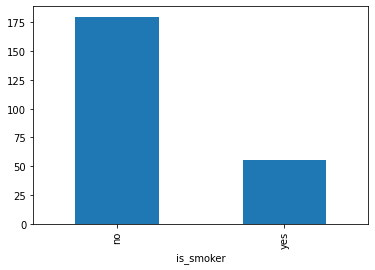

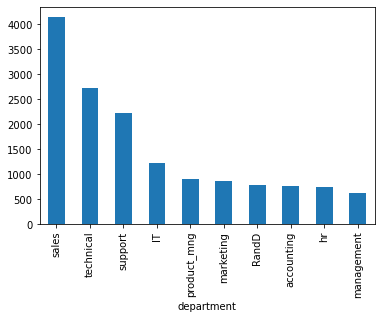

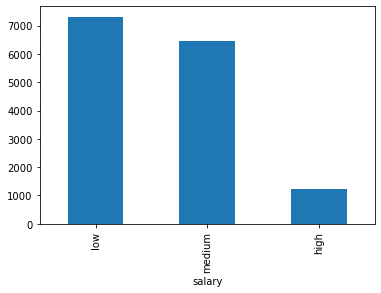

In [7]:
# Print the distibutions
for col in df.columns:
    fig = plt.figure()
    s = df[col]
    if s.dtype in ('float', 'int'):
        num_bins = min((30, len(df[col].unique())))
        s.hist(bins=num_bins)
    else:
        s.value_counts().plot.bar()    
    plt.xlabel(col)

Checking missing values

In [8]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         151
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                14764
department                   0
salary                       0
dtype: int64

In [9]:
# Percentage of missing values
df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

is_smoker has 98.43% missing values do we can delete this variable

In [45]:
# Delete is_smoker variable
del df['is_smoker']

In [46]:
# Replace median values for time_spend_company 
median_tsc = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(median_tsc)

In [47]:
# Replace mean values for average_montly_hours
mean_amh = df.average_montly_hours.mean()
df.average_montly_hours = df.average_montly_hours.fillna(mean_amh)

In [48]:
#check missing values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [49]:
df.left.value_counts()

no     11428
yes     3571
Name: left, dtype: int64

In [50]:
# Convert categorical variable to binary integer representation
df.left = df.left.map({'no': 0, 'yes': 1})
df = pd.get_dummies(df)

In [34]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [51]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']]  # Features
y=df['left']  # Labels

# Split dataset into training set and test set 70 - 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [52]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_std, y_train)

y_pred=rfc.predict(X_test_std)

In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9864444444444445


In [74]:
confusion_matrix(y_test, y_pred)

array([[3452,   10],
       [  51,  987]])

In [75]:
# What is the accuracy by class?

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 99.71%
left = 1 : 95.09%


In [55]:
columns = X.columns

In [56]:
feature_imp = pd.Series(rfc.feature_importances_,index=columns).sort_values(ascending=False)
feature_imp

satisfaction_level        0.322801
time_spend_company        0.173549
number_project            0.161661
average_montly_hours      0.157839
last_evaluation           0.133855
work_accident             0.009061
salary_low                0.007615
salary_high               0.004802
salary_medium             0.004111
department_technical      0.003997
department_sales          0.003266
department_support        0.003018
promotion_last_5years     0.002132
department_accounting     0.002030
department_RandD          0.001980
department_IT             0.001887
department_hr             0.001800
department_product_mng    0.001600
department_management     0.001539
department_marketing      0.001458
dtype: float64

No handles with labels found to put in legend.


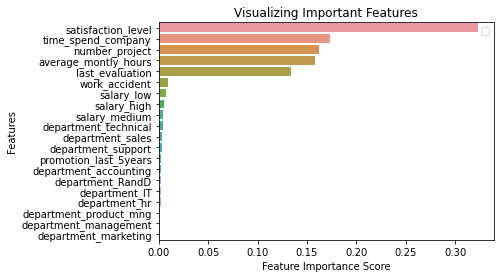

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

We can see satisfaction level is the most important feature.

#### Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

LogisticRegression()

In [60]:
from sklearn.metrics import accuracy_score

y_pred1 = logreg.predict(X_test_std)
acc1 = accuracy_score(y_test, y_pred1)
print('accuracy = {:.1f}%'.format(acc1*100))

accuracy = 79.4%


In [65]:
# What does the confusion matrix look like?

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[3202,  260],
       [ 669,  369]])

In [67]:
# What is the accuracy by class?

print('Percent accuracy score per class:')
cmat1 = confusion_matrix(y_test, y_pred1)
scores1 = cmat1.diagonal() / cmat1.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores1[0]))
print('left = 1 : {:.2f}%'.format(scores1[1]))

Percent accuracy score per class:
left = 0 : 92.49%
left = 1 : 35.55%


#### Support Vector Machine

In [61]:
# Train a support vector machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1, gamma='scale')
svm.fit(X_train_std, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [62]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred2 = svm.predict(X_test_std)
acc2 = accuracy_score(y_test, y_pred2)
print('accuracy = {:.1f}%'.format(acc2*100))

accuracy = 78.3%


In [63]:
# What does the confusion matrix look like?

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[3253,  209],
       [ 768,  270]])

In [68]:
# What is the accuracy by class?

print('Percent accuracy score per class:')
cmat2 = confusion_matrix(y_test, y_pred2)
scores2 = cmat2.diagonal() / cmat2.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores2[0]))
print('left = 1 : {:.2f}%'.format(scores2[1]))

Percent accuracy score per class:
left = 0 : 93.96%
left = 1 : 26.01%


#### K-Nearest Neighbors

In [69]:
# Load the K-Nearest Neighbors class
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_pred3 = knn.predict(X_test_std)
acc1 = accuracy_score(y_test, y_pred3)
print('accuracy = {:.1f}%'.format(acc1*100))

accuracy = 94.2%


In [72]:
confusion_matrix(y_test, y_pred3)

array([[3289,  173],
       [  86,  952]])

In [76]:
# What is the accuracy by class?

print('Percent accuracy score per class:')
cmat3 = confusion_matrix(y_test, y_pred3)
scores3 = cmat3.diagonal() / cmat3.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores3[0]))
print('left = 1 : {:.2f}%'.format(scores3[1]))

Percent accuracy score per class:
left = 0 : 95.00%
left = 1 : 91.71%
